quiz10: network partitioning

({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}, {8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})


/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


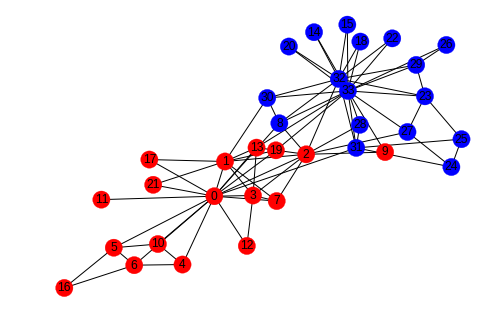

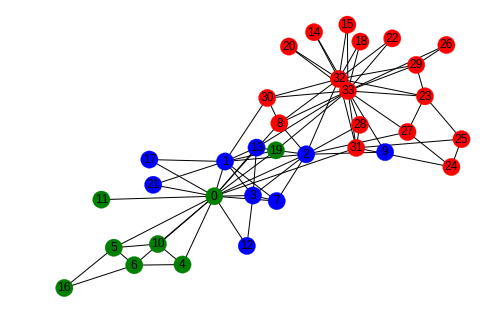

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as LA
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import kernighan_lin_bisection

G = nx.karate_club_graph()
color_map = ['yellow'] * (nx.number_of_nodes(G) - 1)
# print(color_map)
color_map.append('red')
# print(color_map)

colors = ['red', 'blue', 'green', 'purple', 'brown', 'yellow']
pos = nx.spring_layout(G)



lst_b = kernighan_lin_bisection(G)
print(lst_b)
color_map_b = ['black'] * nx.number_of_nodes(G)
# fill in this part
for idx in lst_b[0]:
  color_map_b[idx] = 'red'
for idx in lst_b[1]:
  color_map_b[idx] = 'blue'
  
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_b)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()



lst_c = list(greedy_modularity_communities(G))
color_map_c = ['black'] * nx.number_of_nodes(G)
# fill in this part
for idx in lst_c[0]:
  color_map_c[idx] = 'red'
for idx in lst_c[1]:
  color_map_c[idx] = 'blue'
for idx in lst_c[2]:
  color_map_c[idx] = 'green'

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=color_map_c)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()


random graph and the size of giant component

# of components (p=0.01):  47
size of the giant component (p=0.01): 22
# of components (p=0.015):  27
size of the giant component (p=0.015): 57
# of components (p=0.02):  16
size of the giant component (p=0.02): 84
# of components (p=0.025):  16
size of the giant component (p=0.025): 80


<Container object of 16 artists>

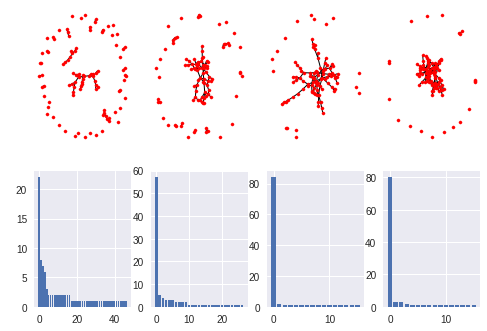

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

er01 = nx.erdos_renyi_graph(100, 0.01)
plt.subplot(241)
nx.draw(er01, node_size=10, node_color='red')
print("# of components (p=0.01): ", nx.number_connected_components(er01))
print("size of the giant component (p=0.01):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er01), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er01):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(245)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

er015 = nx.erdos_renyi_graph(100, 0.015)
plt.subplot(242)
nx.draw(er015, node_size=10, node_color='red')
print("# of components (p=0.015): ", nx.number_connected_components(er015))
print("size of the giant component (p=0.015):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er015), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er015):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(246)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

er02 = nx.erdos_renyi_graph(100, 0.02)
plt.subplot(243)
nx.draw(er02, node_size=10, node_color='red')
print("# of components (p=0.02): ", nx.number_connected_components(er02))
print("size of the giant component (p=0.02):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er02), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er02):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(247)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

er025 = nx.erdos_renyi_graph(100, 0.025)
plt.subplot(244)
nx.draw(er025, node_size=10, node_color='red')
print("# of components (p=0.025): ", nx.number_connected_components(er025))
print("size of the giant component (p=0.025):", nx.number_of_nodes((max(nx.connected_component_subgraphs(er025), key=len))))
lst = []
for c in nx.connected_component_subgraphs(er025):
  lst.append(len(c))
lst.sort(reverse=True)
plt.subplot(248)
left = np.array(range(len(lst)))
height = np.array(lst)
plt.bar(left, height)

triangles and clustering coefficient of random graph
(only few number of triangles)

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
cc = 0
tr = 0
for i in range(10000):
  G = nx.erdos_renyi_graph(10, 0.15)
  cc = cc + nx.transitivity(G)
  tr = tr + sum(nx.triangles(G).values())/3
print("average of transitivity :", cc/10000)
print("average # of triangles :", tr/10000)

#print("triangles",int(sum(nx.triangles(G).values())/3))
#print("average clustering coefficient :", nx.average_clustering(G))
#print("clustering :", nx.transitivity(G))

average of transitivity : 0.09583972482120892
average # of triangles : 0.399


x axis : probability of random connection
y axis : size of the giant component

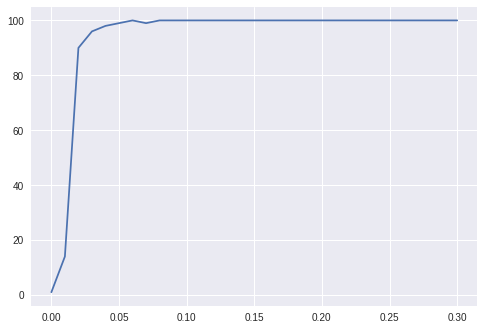

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

x = range(31)
y = [0] * 31
for i in x:
  erx = nx.erdos_renyi_graph(100, i*0.01)
  y[i] = nx.number_of_nodes((max(nx.connected_component_subgraphs(erx), key=len))) 
plt.plot(list(map(lambda x: x * 0.01, x)), y)